Importamos librerías

In [10]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.cbook as cbook
import matplotlib.colors as colors

from scipy.special import factorial as fact
from scipy.special import sph_harm_y as sph_harm
import scipy as sp

import warnings
warnings.filterwarnings("ignore")

Definimos constantes

In [11]:
a0 = 1 # simplicidad, con esto las unidades de r van a ser 1/Radio de Bohr

Definimos el número de pasos para discretizar el espacio

In [19]:
N = 1000

Ahora definimos las funciones para calcular la función de onda, estas fueron obtenidas del Cohen, capítulo VII, ecuaciones C-23, C-26, C-35 y C-38.

In [20]:
def lamda(k,l):
    return 1/(k+l)

def c(k,l,q):
    return (-1)**q * (2/(k+l))**q * (fact(k-1)/fact(k-q-1)) * (fact(2*l+1)/(fact(q)*fact(q+2*l+1)))

def y(k, l, rho):
    sum = 1

    for q in range(k):
        sum = sum + c(k,l,q) * rho**q
    
    return rho**(l+1)*sum

def u(k,l,rho):
    return np.exp(-rho*lamda(k,l)) * y(k,l,rho)

def c0(k,l):
    def integrand(r,k,l):
        return  np.conjugate(u(k,l,r/a0)) * u(k,l,r/a0)
        
    return np.sqrt(1 / (sp.integrate.quad(integrand ,0 ,np.inf, args=(k,l))[0]))
    
def u_norm(k,l,rho):
    return c0(k,l) * u(k,l,rho)


def R(k,l,r):
    return (1/r) * u_norm(k,l,r/a0)

def psi(k, l, m, r, theta, phi):
    return R(k,l,r) * sph_harm(l, m, theta, phi)

def P(k, l, m, r, theta, phi):
    return np.conjugate(psi(k, l, m, r, theta, phi)) * psi(k, l, m, r, theta, phi)

Ahora discretizamos el espacio

In [21]:
r_disc, theta_disc = np.meshgrid(np.linspace(0.1,85,N),np.linspace(0,2*np.pi,N)) # El radio llega hasta 85 radios de bohr para que calce con la escala de la imagen original
z_axe = r_disc * np.cos(theta_disc)                                              # Como el grafico es simétrico los límites de theta pueden ser 0 y 2pi
x_axe = r_disc * np.sin(theta_disc) * np.cos(phi0)

Definimos la función para graficar los orbitales

In [15]:
def Gen_Save_Graph(k,l,m, limInf):

    Density = P(k, l, m, r_disc, theta_disc, phi0)
    
    fig = plt.figure(figsize=(8,7))
    ax = fig.add_subplot(1, 1, 1)
    
    COLOR = 'white'
    mpl.rcParams['text.color'] = COLOR
    mpl.rcParams['axes.labelcolor'] = COLOR
    mpl.rcParams['xtick.color'] = COLOR
    mpl.rcParams['ytick.color'] = COLOR
    
    plt.pcolormesh(x_axe, z_axe, np.real(Density), norm=colors.LogNorm(vmin=limInf, vmax=np.real(Density.max())), cmap="gnuplot2")#, shading="gouraud"
    
    plt.xlim([x_axe.min()-0.5,x_axe.max()+0.5])
    plt.ylim([z_axe.min()-0.5,z_axe.max()+0.5])
    
    ax.set_xticks([])
    ax.set_yticks([])
    
    ax.set_facecolor('xkcd:black')
    fig.patch.set_facecolor('xkcd:black')
    ax.set_title(f"{k},{l},{m}")
    plt.colorbar()
    
    plt.show()

Debido a las escalas tan diferentes que tiene la densidad de probabilidad de cada combinación de ``klm``, se debe definir manualmente un límite inferior para cada orbital, para generar todas las gráficas iterando en ``klm`` y tomando en cuenta la escala, se va a hacer un diccionario.

In [23]:
limInf = {"1,0,0":1e-5, "2,0,0":1e-5, "2,1,0":1e-5, "2,1,1":1e-5, "3,0,0":1e-6, "3,1,0":1e-6, "3,1,1":1e-6, "3,2,0":1e-6, "3,2,1":1e-6, "3,2,2":1e-6, "4,0,0":1e-8, "4,1,0":1e-8, "4,1,1":1e-8, "4,2,0":5e-9, "4,2,1":1e-9, "4,2,2":5e-9, "4,3,0":1e-8, "4,3,1":1e-8, "4,3,2":1e-8, "4,3,3":1e-8}

Ahora se grafican todos los orbitales hasta el ``4,3,3``

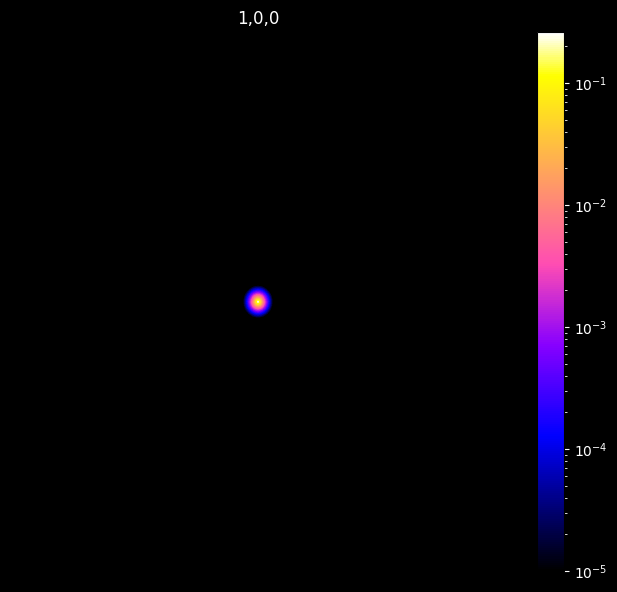

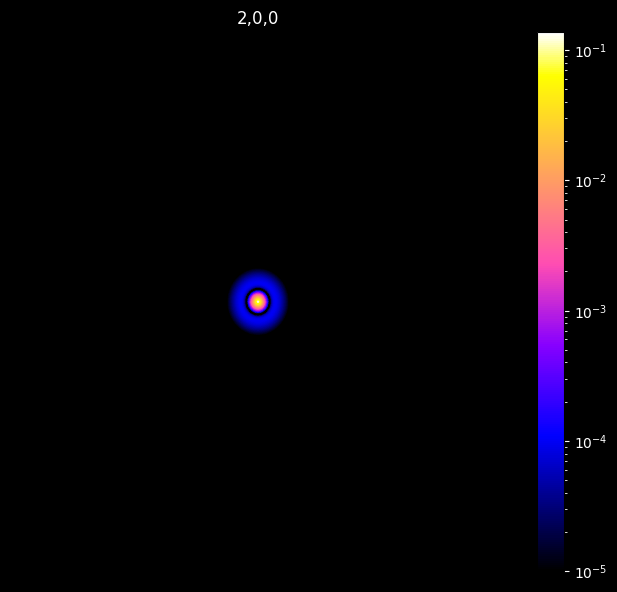

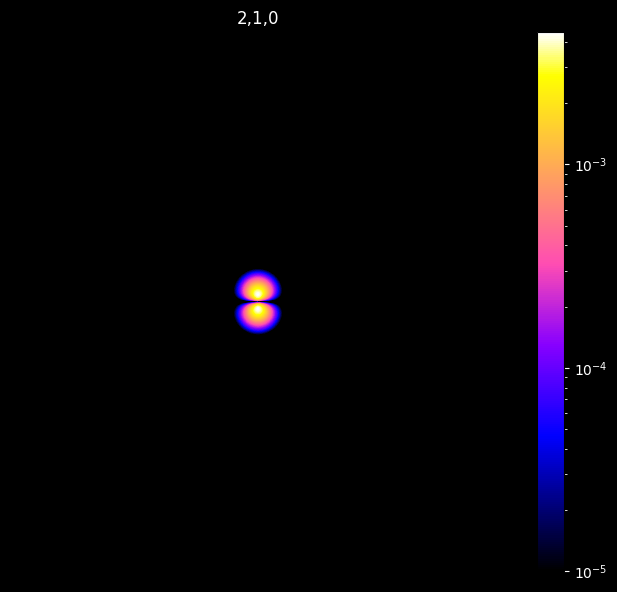

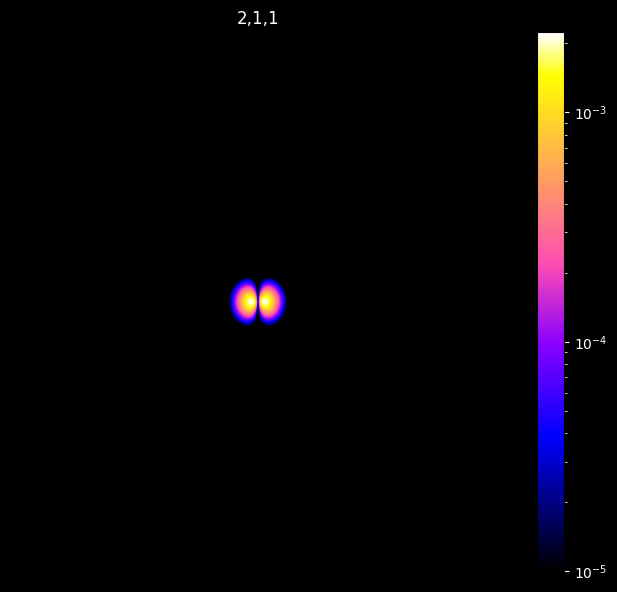

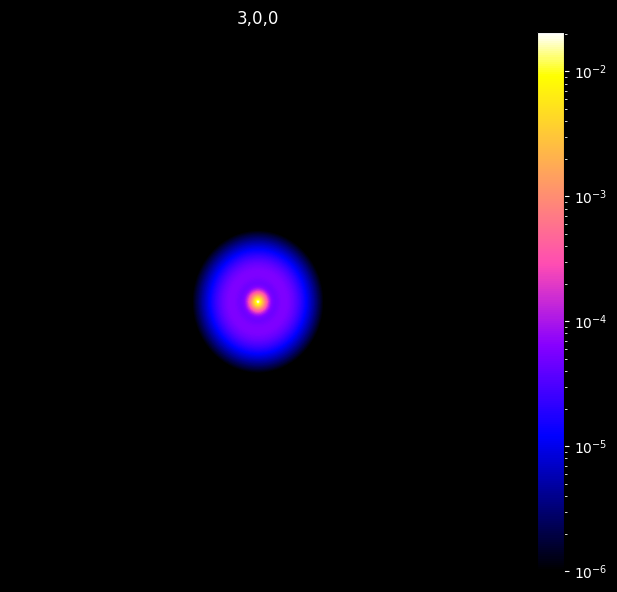

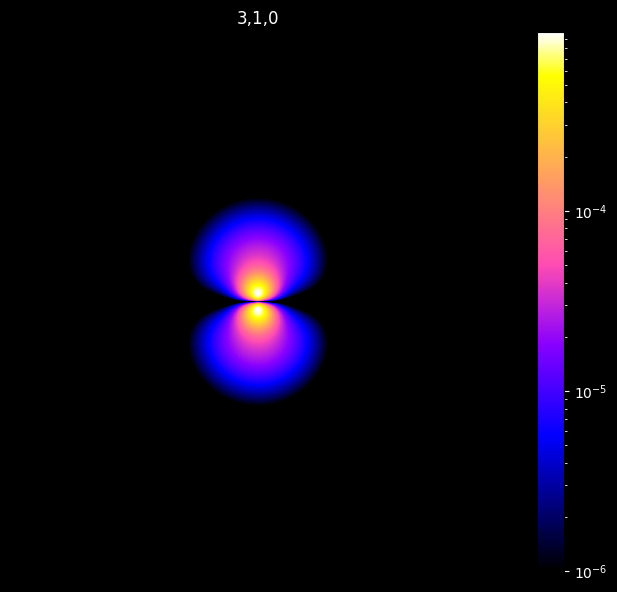

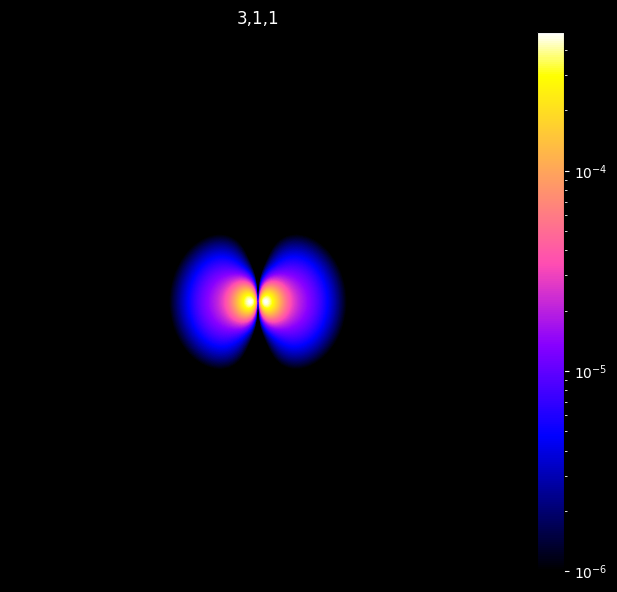

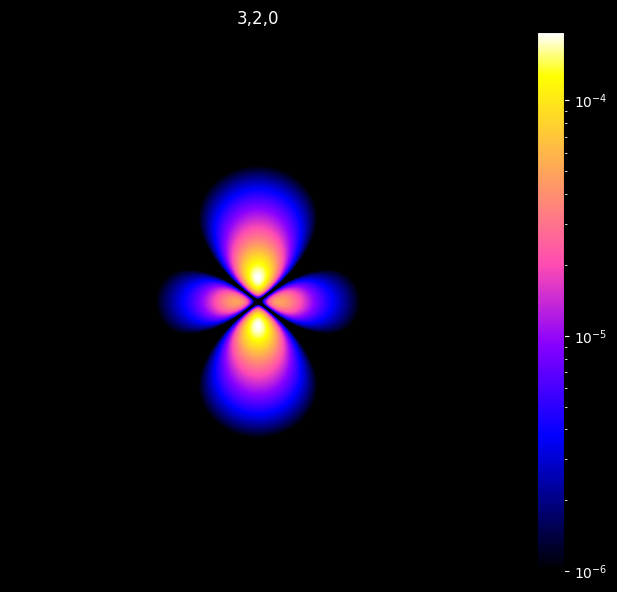

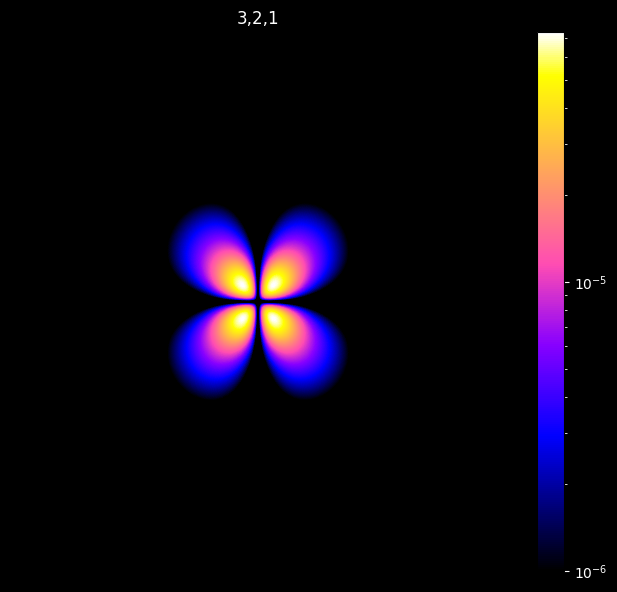

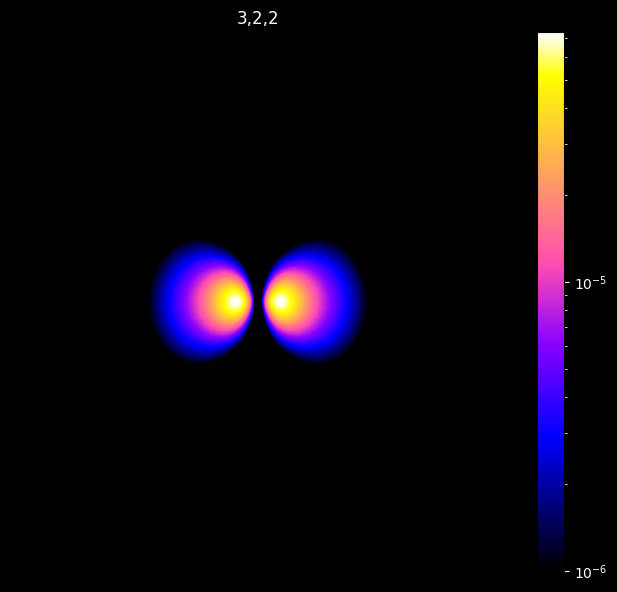

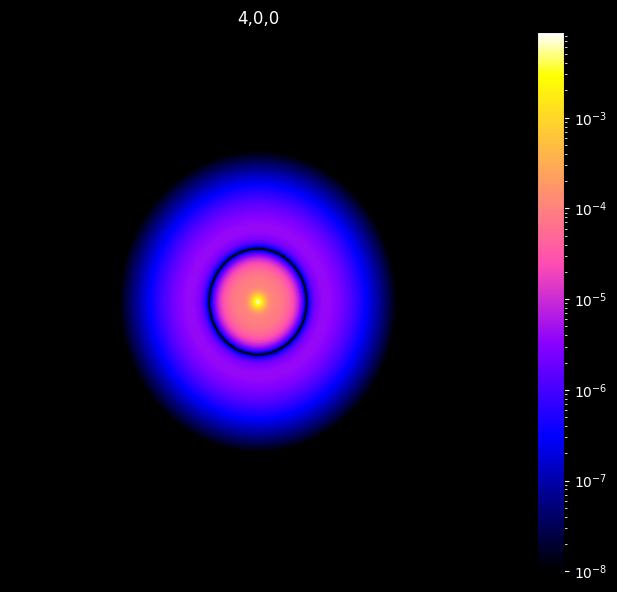

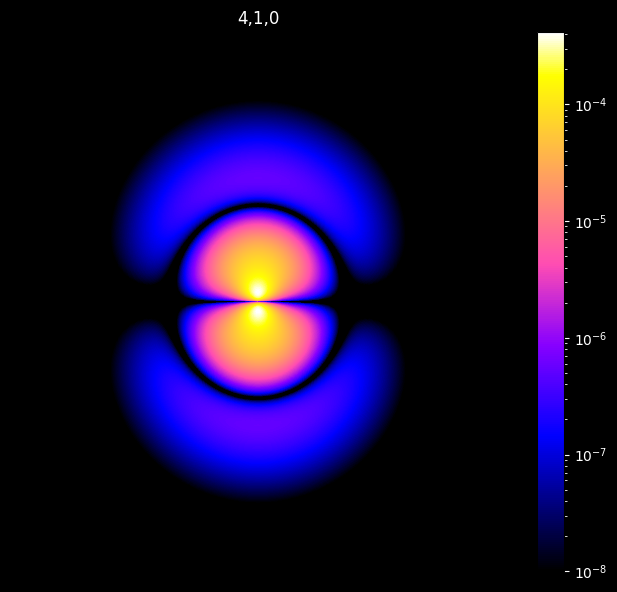

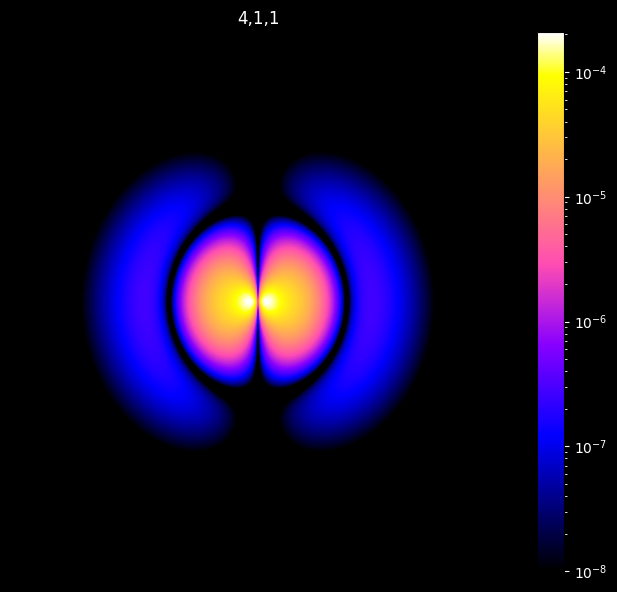

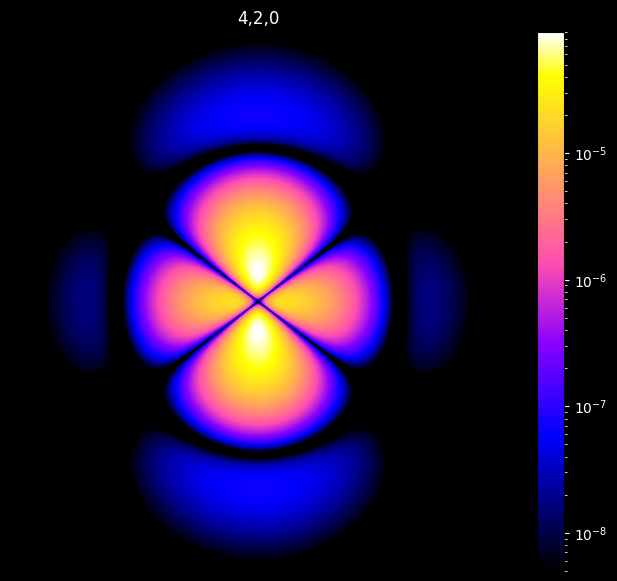

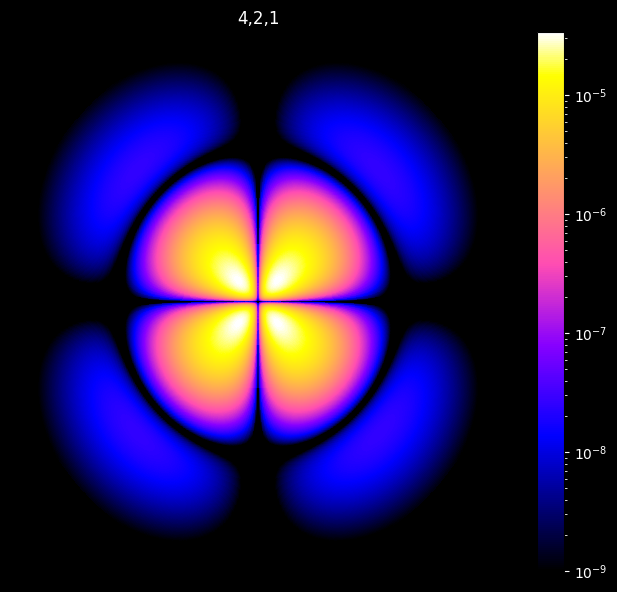

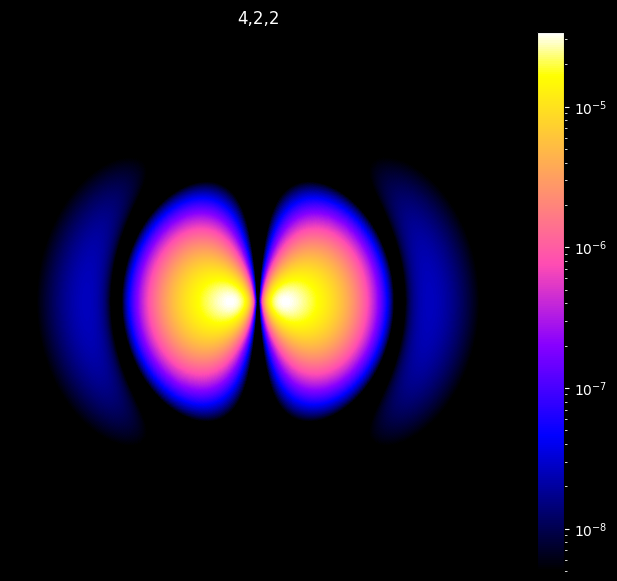

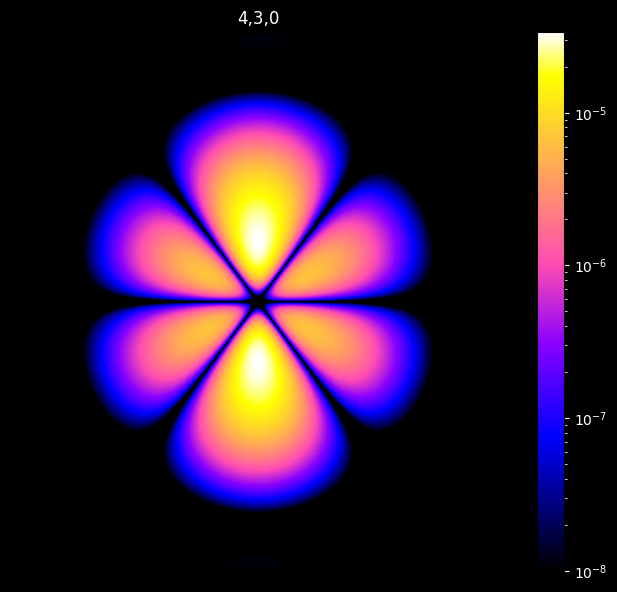

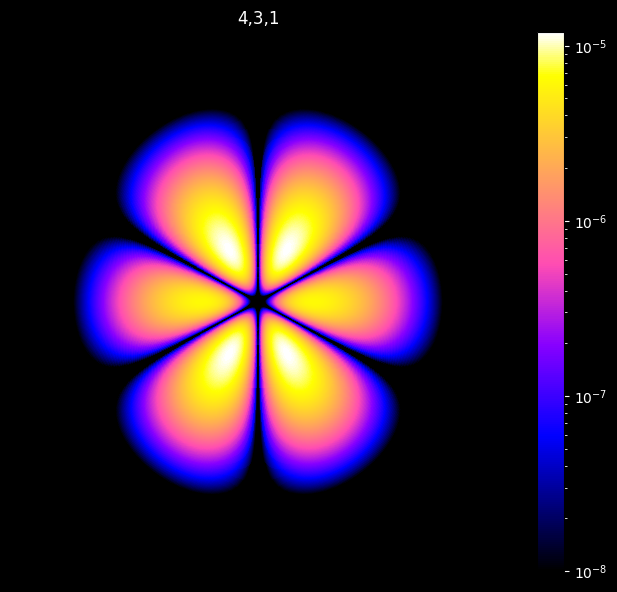

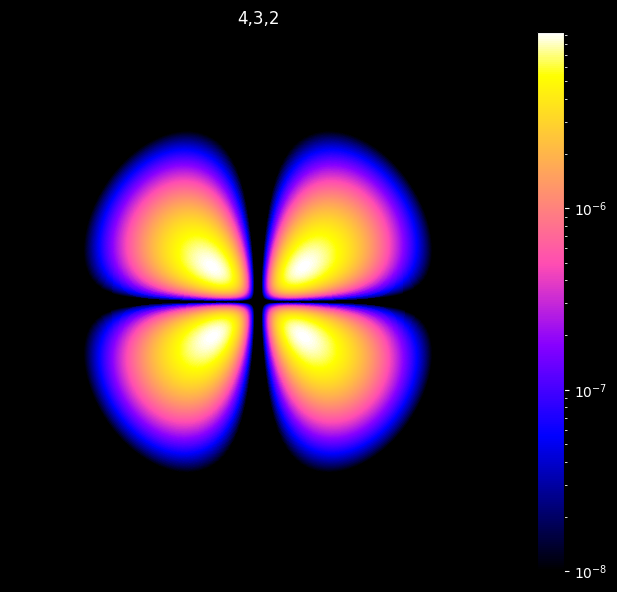

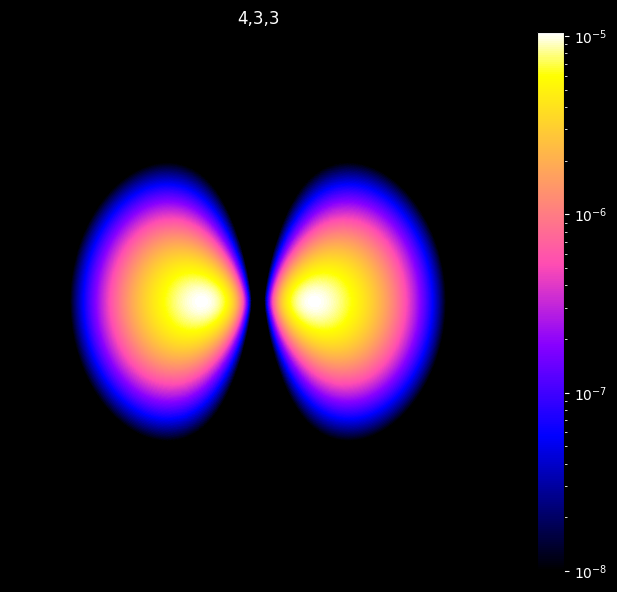

In [25]:
for k in range(1,5):
    for l in range(k):
        for m in range(l+1):
            Gen_Save_Graph(k,l,m, limInf[f'{k},{l},{m}'])